# Ecuaciones de Lotka-Volterra: modelo presa depredador.

## Introducción

Resulta intuitivo pensar que las poblaciones de un animal depredador y su presa están relacionadas de algún modo en el que si una aumenta, la otra lo hace también. Utilizaremos como ejemplo en este artículo un ecosistema aislado y formado por leones y cebras que viven en armonía, es decir, los leones comiéndose a las cebras. Imaginemos que por cualquier circunstancia, por ejemplo, por disponer de mayor cantidad de alimento, aumenta la población de cebras; los leones dispondrán de más alimento y su población aumentará, pero ¿qué ocurrirá a partir de este momento? Si la población de leones llega a ser demasiado grande para el número de cebras en nuestra sabana, podrían acabar con todas, provocando su propia extinción por inanición. Pero incluso si el festín no es tan grande como para comerse todas las cebras, pero sí para dejar una población muy mermada, probablemente los leones tendrán que pasar hambre una buena temporada y algunos de ellos morirán hasta que las cebras tengan tiempo suficiente para reproducirse y volver a ser pasto de los leones. ¿Cuántas cebras morirán en el atracón? ¿Cuánto tiempo pasarán los leones hambre? ¿Cuántos morirán?

## Ecuaciones

Las ecuaciones de Lotka-Volterra son un modelo biomatemático que pretende responder a estas cuestiones prediciendo la dinámica de las poblaciones de presa y depredador bajo una serie de hipótesis:

* El ecosistema está aislado: no hay migración, no hay otras especies presentes, no hay plagas...
* La población de presas en ausencia de depredadores crece de manera exponencial: la velocidad de reproducción es proporcional al número de individuos. Las presas sólo mueren cuando son cazadas por el depredador.
* La población de depredadores en ausencia de presas decrece de manera exponencial.
* La población de depredadores afecta a la de presas haciéndola decrecer de forma proporcional al número de presas y depredadores (esto es como decir de forma proporcional al número de posibles encuentros entre presa y depredador).
* La población de presas afecta a la de depredadores también de manera proporcional al número de encuentros, pero con distinta constante de proporcionalidad (dependerá de cuanto sacien su hambre los depredadores al encontrar una presa).

Se trata de un sistema de dos ecuaciones diferenciales de primer orden, acopladas, autónomas y no lineales:

$$ \frac{dx}{dt} = \alpha x - \beta x y $$
$$ \frac{dy}{dt} = -\gamma y + \delta y x $$

donde x es el número de presas (cebras en nuestro caso) e y es el número de depredadores (leones). Los parámetros son constantes positivas que representan:

* $\alpha$: tasa de crecimiento de las presas.
* $\beta$: éxito en la caza del depredador.
* $\gamma$: tasa de decrecimiento de los depredadores.
* $\delta$: éxito en la caza y cuánto alimenta cazar una presa al depredador.

## Resolución

Resolveremos este sistema en Python usando la función `odeint` en `scipy.integrate`. Puedes ver cómo funciona en el artículo [El salto de Felix Baumgartner en Python](http://pybonacci.org/2012/10/15/el-salto-de-felix-baumgartner-en-python/). Para esto usaremos: Python 3.4, numpy	1.9.0, matplotlib 1.4.0, scipy 0.14.0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib inline

Definimos la función que representará el sistema de ecuaciones en forma canónica para pasárselo a `odeint`:

In [3]:
def df_dt(x, t, a, b, c, d):
    
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    
    return np.array([dx, dy])

Definimos los parámetros de nuestro problema, las condiciones iniciales y el tiempo final de la integración así como el número de pasos.

In [4]:
# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01

# Condiciones iniciales
x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)

Resolvemos la ecuación:

In [5]:
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

y representamos los resultados en función del tiempo:

In [6]:
#plt.style.use('pybonacci')

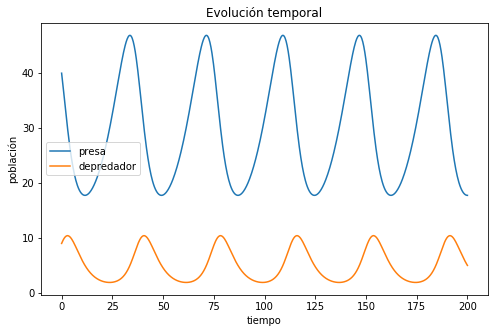

In [7]:
plt.figure("Evolución temporal", figsize=(8,5))
plt.title("Evolución temporal")
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')
plt.xlabel('tiempo')
plt.ylabel('población')
plt.legend()
plt.savefig('evolucion_temporal.png')

Otra forma interesante de visualizar estos datos es ver el número de presas en función del número de depredadores en lugar de a lo largo del tiempo, es decir, podemos visualizar su mapa de fases:

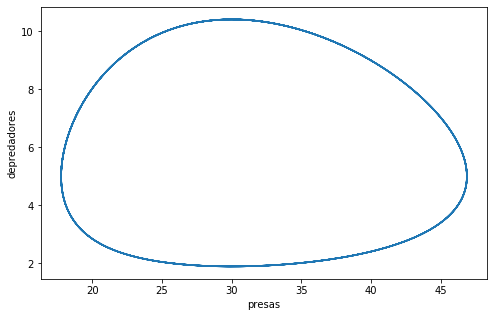

In [8]:
plt.figure("Presas vs depredadores", figsize=(8,5))
plt.plot(solucion[:, 0], solucion[:, 1])
plt.xlabel('presas')
plt.ylabel('depredadores')
plt.savefig('presas_vs_depredadores.png')

Vemos que se trata de una solución periódica en la que, como decíamos al principio, un aumento en la población de cebras va seguido del aumento del número de leones. Un gran número de depredadores merma la población de presas y a los pobres leones les toca pasar hambre una temporada. Otra forma interesante de visualizar estos datos es ver el número de presas en función del número de depredadores, en lugar de a lo largo del tiempo, es decir, podemos visualizar su mapa de fases. Podemos pintar también el campo de direcciones de nuestras ecuaciones usando la función `quiver`. El tamaño de las flechas se ha normalizado para que todas tengan la misma longitud y se ha usado un `colormap` para representar el módulo.

/home/santy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/santy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


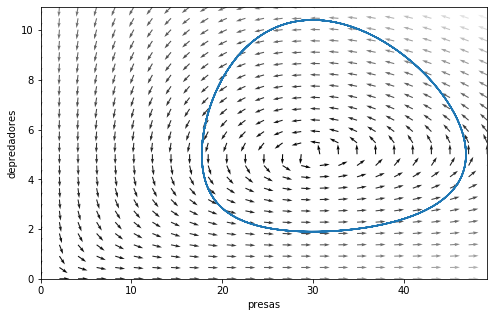

In [9]:
x_max = np.max(solucion[:,0]) * 1.05
y_max = np.max(solucion[:,1]) * 1.05

x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)

xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

plt.figure("Campo de direcciones", figsize=(8,5))
plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
plt.plot(solucion[:, 0], solucion[:, 1])
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('presas')
plt.ylabel('depredadores')
plt.savefig('campo_direcciones.png')

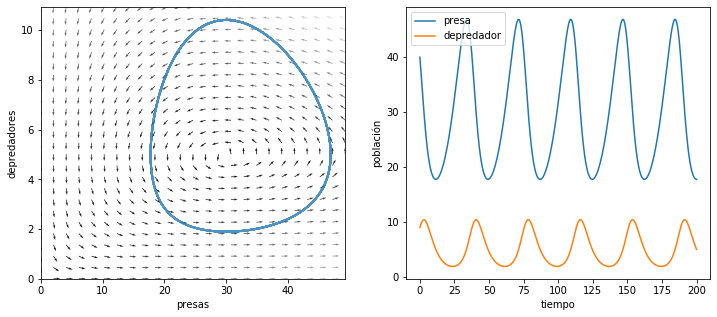

In [10]:
n_max = np.max(solucion) * 1.10

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

ax[0].quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')
plt.savefig('campo_direcciones_ev_temporal.png')

Si nos fijamos en la línea azul, la coordenada x en cada punto indica el número de presas y la coordenada y el número de depredadores. La evolución a lo largo del tiempo que hemos representado antes, se obtiene al recorrer esta curva en sentido antihorario. Podemos ver también como el campo de direcciones nos señala la tendencia del sistema en cada situación. Por ejemplo, una flecha que apunta hacia arriba a la derecha indica que con ese número de cebras y leones en nuestra sabana, la tendencia será que aumenten ambos.

Llegados a este punto podemos preguntarnos qué habría ocurrido si el número inicial de cebras y leones hubiese sido otro. Como ya sabemos integrar ecuaciones diferenciales, bastaría con cambiar nuestra `x0` e `y0` y repetir el proceso (incluso podríamos hacer un widget interactivo). Sin embargo, se puede demostrar que a lo largo de las líneas del mapa de fases, como la que hemos pintado antes, se conserva la cantidad:

$$ C = \alpha \ln{y} - \beta y + \gamma \ln{x} -\delta x $$

Por tanto, pintando un `contour` de esta cantidad podemos obtener la solución para distintos valores iniciales del problema.

In [11]:
def C(x, y, a, b, c, d):
    return a * np.log(y) - b * y + c * np.log(x) - d * x

/home/santy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


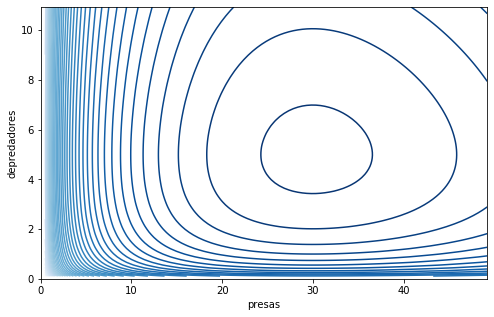

In [12]:
x = np.linspace(0, x_max, 100)
y = np.linspace(0, y_max, 100)
xx, yy = np.meshgrid(x, y)
constant = C(xx, yy, a, b, c, d)

plt.figure('distintas_soluciones', figsize=(8,5))
plt.contour(xx, yy, constant, 50, cmap=plt.cm.Blues)
plt.xlabel('presas')
plt.ylabel('depredadores')
plt.savefig('distintas_soluciones.png')

Vemos que estas curvas se van haciendo cada vez más y más pequeñas, hasta que, en nuestro caso, colapsarían en un punto en torno a $(30,5)$. Se trata de un punto de equilibrio o punto crítico; si el sistema lo alcanzase, no evolucionaría y el número de cebras y leones sería constante en el tiempo. El otro punto crítico de nuestro sistema es el $(0,0)$. Analizándolos matemáticamente se obtiene que:

El punto crítico situado en $(0,0)$ es un punto de silla. Al tratarse de un punto de equilibrio inestable la extinción de cualquiera de las dos especies en el modelo sólo puede conseguirse imponiendo la condición inicial nula.
El punto crítico situado en $(γ/δ,α/β)$ es un centro (en este caso los autovalores de la matriz del sistema linealizado son ambos imaginarios puros, por lo que a priori no se conoce su estabilidad).

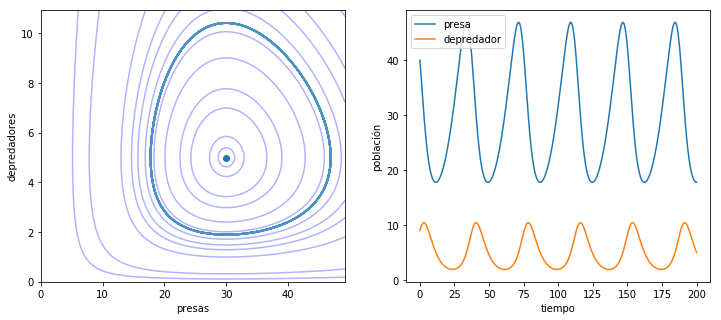

In [13]:
#n_max = np.max(solucion) * 1.10

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].scatter(c/d, a/b)
levels = (0.5, 0.6, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.775, 0.78, 0.781)
ax[0].contour(xx, yy, constant, levels, colors='blue', alpha=0.3)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')
plt.savefig('distintas_soluciones_ev_temporal.png')

## Mejorando el modelo

Como se puede observar, este modelo tiene algunas deficiencias propias de su simplicidad y derivadas de las hipótesis bajo las que se ha formulado. Una modificación razonable es cambiar el modelo de crecimiento de las presas en ausencia de depredadores, suponiendo que en vez de aumentar de forma exponencial, lo hacen según una [función logística](http://es.wikipedia.org/wiki/Funci%C3%B3n_log%C3%ADstica). Esta curva crece de forma similar a una exponencial al principio, moderándose después y estabilizándose asintóticamente en un valor:

In [13]:
def logistic_curve(t, a=1, m=0, n=1, tau=1):
    e = np.exp(-t / tau)
    return a * (1 + m * e) / (1 + n * e) 

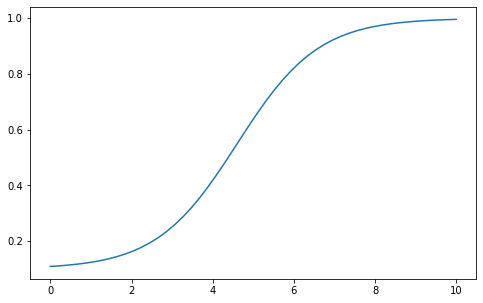

In [14]:
x_ = np.linspace(0,10)
plt.figure('función logística', figsize=(8,5))
plt.plot(x_, logistic_curve(x_, 1, m=10, n=100, tau=1))
plt.savefig('funcion_logistica.png')

Podemos observar como esta curva crece de forma similar a una exponencial al principio, moderándose después y estabilizándose asintóticamente en un valor. Este modelo de crecimiento representa mejor las limitaciones en el número de presas debidas al medio (falta de alimento, territorio...). Llevando este modelo de crecimiento a las ecuaciones originales se tiene un nuevo sistema en el que interviene un parámetro más:

$$ \frac{dx}{dt} = (\alpha x - r x^2) - \beta x y $$
$$ \frac{dy}{dt} = -\gamma y + \delta y x $$

In [15]:
def df_dt_logistic(x, t, a, b, c, d, r):
    
    dx = a * x[0] - r * x[0]**2 - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    
    return np.array([dx, dy])

In [16]:
# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01
r = 0.001

# Condiciones iniciales
x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)

In [17]:
solucion_logistic = odeint(df_dt_logistic, conds_iniciales, t, args=(a, b, c, d, r))

/home/santy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/home/santy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


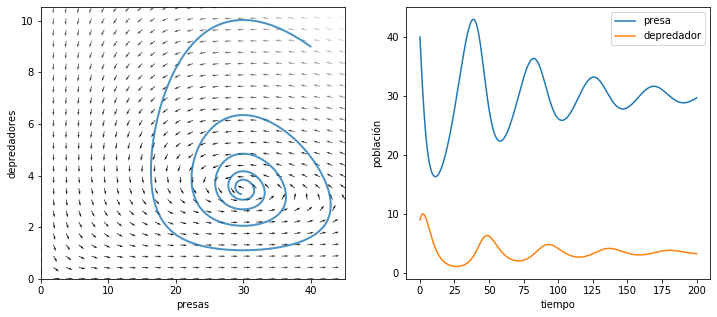

In [18]:
n_max = np.max(solucion) * 1.10

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

x_max = np.max(solucion_logistic[:,0]) * 1.05
y_max = np.max(solucion_logistic[:,1]) * 1.05

x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)

xx, yy = np.meshgrid(x, y)
uu, vv = df_dt_logistic((xx, yy), 0, a, b, c, d, r)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

ax[0].quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
ax[0].plot(solucion_logistic[:, 0], solucion_logistic[:, 1], lw=2, alpha=0.8)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion_logistic[:, 0], label='presa')
ax[1].plot(t, solucion_logistic[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')
plt.savefig('campo_direcciones_ev_temporal_caso2.png')

En este caso se puede observar como el comportamiento deja de ser periódico. El punto crítico que antes era un centro, se convierte en un atractor y la solución tiende a estabilizarse en un número fijo de presas y depredadores.

## Referencias

Si tienes curiosidad sobre como seguir perfeccionando este modelo o cómo incluir otras especies, quizás quieras echar un vistazo a:

* [Competitive Lotka–Volterra equations](http://en.wikipedia.org/wiki/Competitive_Lotka%E2%80%93Volterra_equations) o [The Predator-Prey Equations](http://www.math.psu.edu/tseng/class/Math251/Notes-Predator-Prey.pdf)

* [Presentación ETSIINF-UPM](http://www.dma.fi.upm.es/docencia/mastercaci/2012-2013/sistemascomplejos/projects/lotka-volterra.pdf)

* [Apuntes de ecuaciones diferenciales](http://matap.dmae.upm.es/WebpersonalBartolo/EDOoficial.html), Bartolomé Luque Serrano (ETSIA-UPM).

* Si te interesa ver cómo realizar la integración con diferentes métodos, puedes visitar [Predator Prey Model - Bank Assignment of Numerical Mooc](http://nbviewer.ipython.org/github/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb).

## Widgets

In [20]:
from IPython.html.widgets import interact

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [21]:
def solucion_temporal_interact(a, b, c, d, x0, y0, tf):
    
    conds_iniciales = np.array([x0, y0])

    # Condiciones para integración
    N = 800
    t = np.linspace(0, tf, N)
    
    solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))
    
    plt.figure("Evolución temporal", figsize=(8,5))
    plt.title("Evolución temporal")
    plt.plot(t, solucion[:, 0], label='presa')
    plt.plot(t, solucion[:, 1], label='depredador')
    plt.xlabel('tiempo')
    plt.ylabel('población')
    plt.legend()

In [22]:
interact(solucion_temporal_interact,
         a=(0.01,0.5), b=(0.01,0.5),
         c=(0.01,0.5), d=(0.01,0.5),
         x0=(1,80), y0=(1,50),
         tf=(50,300));

interactive(children=(FloatSlider(value=0.255, description='a', max=0.5, min=0.01), FloatSlider(value=0.255, d…

In [23]:
def mapa_fases_interact(a, b, c, d, x0, y0, tf):
    
    conds_iniciales = np.array([x0, y0])

    # Condiciones para integración
    N = 800
    t = np.linspace(0, tf, N)
    
    solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))
    
    x_max = np.max(solucion[:,0]) * 1.05
    y_max = np.max(solucion[:,1]) * 1.05

    x = np.linspace(0, x_max, 25)
    y = np.linspace(0, y_max, 25)

    xx, yy = np.meshgrid(x, y)
    uu, vv = df_dt((xx, yy), 0, a, b, c, d)
    norm = np.sqrt(uu**2 + vv**2)
    uu = uu / norm
    vv = vv / norm

    plt.figure("Campo de direcciones", figsize=(8,5))
    plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
    plt.plot(solucion[:, 0], solucion[:, 1])
    plt.xlim(0, x_max)
    plt.ylim(0, y_max)
    plt.xlabel('presas')
    plt.ylabel('depredadores')
    plt.savefig('campo_direcciones.png')

In [24]:
interact(mapa_fases_interact,
         a=(0.01,0.5), b=(0.01,0.5),
         c=(0.01,0.5), d=(0.01,0.5),
         x0=(1,80), y0=(1,50),
         tf=(50,300));

interactive(children=(FloatSlider(value=0.255, description='a', max=0.5, min=0.01), FloatSlider(value=0.255, d…

# ¿¿Te atreves con alguna otra??

In [25]:
%load_ext version_information

ModuleNotFoundError: No module named 'version_information'

In [ ]:
%version_information, numpy, matplotlib, scipy